In [1]:
import pandas as pd

# подгружаем датасет
df = pd.read_csv('data_eda_merged.csv')

In [104]:
pd.set_option('display.max_columns', None)

In [105]:
df.head()

,title,average_rating,director,writer,metascore,cast,country_of_origin,languages,runtime,genre,budget,worldwide_gross,release_year,profit_or_loss,p&l_rate,lang_cnt,country_cnt,coproduction,writer_1,writer_2,writer_3,writer_4,writer_5,cast_1,cast_2,cast_3,cast_4,cast_5,language_1,language_2,language_3,language_4,language_5,genre_1,genre_2,genre_3,genre_4,genre_5,country_of_origin_1,country_of_origin_2,country_of_origin_3,country_of_origin_4,country_of_origin_5
0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82,"Morgan Freeman, Bob Gunton, William Sadler, C...",United States,English,142,Drama,25000000,29332133,1994,4332133,17.33,1,1,0,Stephen King,Frank Darabont,NaN,NaN,NaN,Morgan Freeman,Bob Gunton,William Sadler,Clancy Brown,Gil Bellows,English,NaN,NaN,NaN,NaN,Drama,NaN,NaN,NaN,NaN,United States,NaN,NaN,NaN,NaN
1,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100,"Al Pacino, James Caan, Diane Keaton, Richard ...",United States,"English, Italian, Latin",175,"Crime, Drama",6000000,250342198,1978,244342198,4072.37,3,1,0,Mario Puzo,Francis Ford Coppola,NaN,NaN,NaN,Al Pacino,James Caan,Diane Keaton,Richard S. Castellano,Robert Duvall,English,Italian,Latin,NaN,NaN,Crime,Drama,NaN,NaN,NaN,United States,NaN,NaN,NaN,NaN
2,The Dark Knight,9.0,Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer",84,"Heath Ledger, Aaron Eckhart, Michael Caine, M...","United States, United Kingdom","English, Mandarin",152,"Action, Crime, Drama",185000000,1009053678,2008,824053678,445.43,2,2,1,Jonathan Nolan,Christopher Nolan,David S. Goyer,NaN,NaN,Heath Ledger,Aaron Eckhart,Michael Caine,Maggie Gyllenhaal,Gary Oldman,English,Mandarin,NaN,NaN,NaN,Action,Crime,Drama,NaN,NaN,United States,United Kingdom,NaN,NaN,NaN
3,Schindler's List,9.0,Steven Spielberg,"Thomas Keneally, Steven Zaillian",95,"Ralph Fiennes, Ben Kingsley, Caroline Goodall...",United States,"English, Hebrew, German, Polish, Latin",195,"Biography, Drama, History",22000000,322161245,1993,300161245,1364.37,5,1,0,Thomas Keneally,Steven Zaillian,NaN,NaN,NaN,Ralph Fiennes,Ben Kingsley,Caroline Goodall,Jonathan Sagall,Embeth Davidtz,English,Hebrew,German,Polish,Latin,Biography,Drama,History,NaN,NaN,United States,NaN,NaN,NaN,NaN
4,12 Angry Men,9.0,Sidney Lumet,Reginald Rose,97,"Lee J. Cobb, Martin Balsam, John Fiedler, E.G...",United States,English,96,"Crime, Drama",350000,2945,1957,-347055,-99.16,1,1,0,Reginald Rose,NaN,NaN,NaN,NaN,Lee J. Cobb,Martin Balsam,John Fiedler,E.G. Marshall,Jack Klugman,English,NaN,NaN,NaN,NaN,Crime,Drama,NaN,NaN,NaN,United States,NaN,NaN,NaN,NaN


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                1455 non-null   object 
 1   average_rating       1455 non-null   float64
 2   director             1455 non-null   object 
 3   writer               1455 non-null   object 
 4   metascore            1455 non-null   int64  
 5   cast                 1455 non-null   object 
 6   country_of_origin    1455 non-null   object 
 7   languages            1455 non-null   object 
 8   runtime              1455 non-null   int64  
 9   genre                1455 non-null   object 
 10  budget               1455 non-null   int64  
 11  worldwide_gross      1455 non-null   int64  
 12  release_year         1455 non-null   int64  
 13  profit_or_loss       1455 non-null   int64  
 14  p&l_rate             1455 non-null   float64
 15  lang_cnt             1455 non-null   i

In [107]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

Линейная регрессия

In [111]:
# задаем целевую переменную
y = df['worldwide_gross']

# задаем числовые признаки (без 'profit_or_loss' и 'p&l_rate')
X = df[['metascore', 'runtime', 'budget', 'release_year', 'lang_cnt', 'coproduction', 'average_rating']]

# масштабируем
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# разделяем
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# задаем линейную регрессию
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

RMSE: 133602279.48918305
MAE: 78671952.97109585
R²: 0.6286426817970934


In [112]:
# коэффициенты
feature_names = X.columns
coefs = model.coef_
for name, coef in zip(feature_names, coefs):
    print(f"{name}: {coef:.4f}")

metascore: 5858590.2397
runtime: -6551697.6947
budget: 201061104.2378
release_year: 4846478.7954
lang_cnt: 1647752.0039
coproduction: -4183103.7867
average_rating: 36505809.3717


Catboost

In [100]:
# удаляем пустые колонки
df = df.dropna(axis=1, how='all')

# заполняем категориальные
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna('Unknown')

# целевая переменная без логарифмирования
y = df['worldwide_gross']

# признаки (без 'profit_or_loss' и 'p&l_rate')
num_features = ['metascore', 'runtime', 'budget', 'release_year', 'lang_cnt', 'country_cnt', 'coproduction', 'average_rating']
cat_features = ['genre_1', 'language_1', 'country_of_origin_1', 'cast_1', 'writer_1', 'director']

X = df[num_features + cat_features].copy()

# делим данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# модель
model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, cat_features=cat_features, verbose=100, early_stopping_rounds=30, random_state=42)

model.fit(X_train, y_train, eval_set=(X_test, y_test))

# предсказания
y_pred = model.predict(X_test)

# метрики
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("CatBoost RMSE:", rmse)
print("CatBoost MAE:", mae)
print("CatBoost R²:", r2)


0:	learn: 241188207.8410445	test: 206036044.2399523	best: 206036044.2399523 (0)	total: 8.56ms	remaining: 8.55s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 135192705.2
bestIteration = 45

Shrink model to first 46 iterations.
CatBoost RMSE: 135192704.34271726
CatBoost MAE: 75828078.58530447
CatBoost R²: 0.6197486523222633


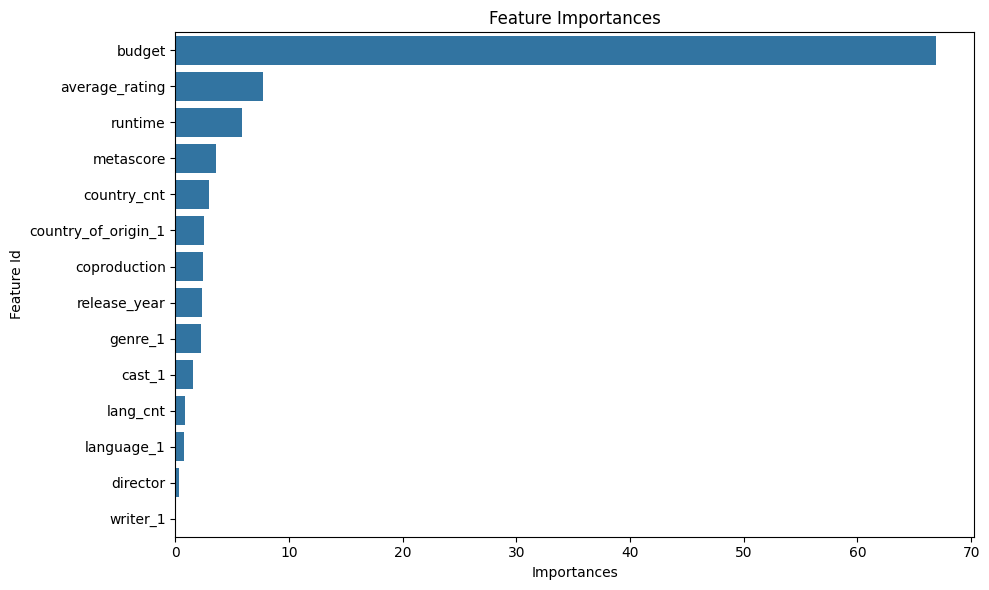

In [101]:
feat_importance = model.get_feature_importance(prettified=True)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importances', y='Feature Id', data=feat_importance)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

In [ ]:
cat_features_idx = [X_train.columns.get_loc(col) for col in cat_features]

cb_model = CatBoostRegressor(iterations=500, verbose=0, early_stopping_rounds=30, random_state=42)

pipeline = Pipeline([('model', cb_model)])
param_grid = {'model__depth': [4, 6, 8, 10], 'model__learning_rate': [0.01, 0.03, 0.1, 0.3], 'model__l2_leaf_reg': [1, 3, 5, 7, 9]}

grid = GridSearchCV(pipeline, param_grid, scoring='neg_root_mean_squared_error', cv=3, verbose=2, n_jobs=-1)
grid.fit(X_train, y_train, model__cat_features=cat_features_idx)

print("Лучшие параметры:", grid.best_params_)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV] END model__depth=4, model__l2_leaf_reg=1, model__learning_rate=0.01; total time=   1.1s
[CV] END model__depth=4, model__l2_leaf_reg=1, model__learning_rate=0.03; total time=   1.1s
[CV] END model__depth=4, model__l2_leaf_reg=1, model__learning_rate=0.03; total time=   1.1s
[CV] END model__depth=4, model__l2_leaf_reg=1, model__learning_rate=0.1; total time=   1.1s
[CV] END model__depth=4, model__l2_leaf_reg=1, model__learning_rate=0.01; total time=   1.1s
[CV] END model__depth=4, model__l2_leaf_reg=1, model__learning_rate=0.01; total time=   1.1s
[CV] END model__depth=4, model__l2_leaf_reg=1, model__learning_rate=0.1; total time=   1.2s
[CV] END model__depth=4, model__l2_leaf_reg=1, model__learning_rate=0.03; total time=   1.2s
[CV] END model__depth=4, model__l2_leaf_reg=1, model__learning_rate=0.3; total time=   1.0s
[CV] END model__depth=4, model__l2_leaf_reg=3, model__learning_rate=0.01; total time=   1.0s
[CV] END mo

In [ ]:
# модель с лучшими параметрами
best_model = grid.best_estimator_

# предсказания
y_pred = best_model.predict(X_test)

# метрики
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("GridSearch CatBoost RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

GridSearch CatBoost RMSE: 132233015.8886066
MAE: 78156566.82222132
R²: 0.6362156120425264


Этапы и общие выводы по построению и оценке модели для прогноза worldwide_gross с помощью линейной регрессии и catboost<br>

1. Собираем модель линейной регрессии без учета 'profit_or_loss' и 'p&l_rate'<br>

Метрики качества на тестовой выборке:<br>
RMSE: 133648938.83978596<br>
MAE: 78980810.83315349<br>
R²: 0.6283832503401943<br>

Выводы:<br>
MAE составила около 79 млн дол.<br>
Основной вклад в предсказание вносят: бюджет фильма — самый значимый положительный признак и оценка зрителей; оценка критиков, год выпуска и количество языков перевода также положительно влияют.<br>
Сопродюсирование и продолжительность фильма имеют отрицательный эффект.<br>

2. Собираем модель CatBoostRegressor и предобрабатываем данные<br>
Из датасета удаляем признаки с полностью пропущенными значениями (writer_4, genre_4 и т.п.), а пропущенные значения в категориальных - заполняем "Unknown".<br>
Проводим логарифмирование целевой переменной, так как worldwide_gross имеет сильный перекос.<br>
Для числовых признаков применяем масштабирование StandardScaler.<br>
Выбираем признаки для построения модели. В категориальных признаках осталяем только genre_1, cast_1 и тд, так как большее добавление данных признаков многократно снижало качество модели.<br>

Полученные метрики:<br>
CatBoost RMSE: 135192704.34271726<br>
CatBoost MAE: 75828078.58530447<br>
CatBoost R²: 0.6197486523222633<br>

Строим график важности признаков. Топ-5: budget, average_rating, runtime, metascore, country_cnt.<br>

3. Подбираем гиперпараметры с помощью GridSearchCV и 3-кратной кросс-валидации:<br>
Лучшие параметры: {'model__depth': 10, 'model__l2_leaf_reg': 3, 'model__learning_rate': 0.3}<br>

Метрики качества:<br>
GridSearch CatBoost RMSE: 132233015.8886066<br>
MAE: 78156566.82222132<br>
R²: 0.6362156120425264<br>

Общие выводы<br>
Для задачи прогнозирования worldwide_gross лучшую точность показала модель CatBoostRegressor с подбором гиперпараметров (R² = 0.636), немного превзойдя по качеству линейную регрессию (R² = 0.628).<br>
Обе модели показали сопоставимые метрики, однако CatBoost лучше справляется с нелинейными зависимостями и категориальными признаками.<br>
Ключевыми факторами, влияющими на сборы фильма, оказались: бюджет, зрительский рейтинг, продолжительность, оценка критиков и число стран-участниц.<br>
Логарифмирование целевой переменной и отбор признаков существенно повлияли на стабильность и интерпретируемость модели.<br>